# Homework #9 - _work in progress_

## Problem 1

![](https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/P602.png)

For the system shown in above, let F = 10N, M = 15N · m, , $\phi$ = 80$^o$, and assume that the rod is slender with mass m = 1kg, length l = 1m. 

Its initial conditions are $\theta$ = 45$^o$ and $\dot{\theta}$= 150 rad/s. 

Create the system of equations using the augmented formulation and solve using `solve_ivp` for $\mathbf{q}(t)=[\mathbf{R},~ \theta]^T$ and the reaction forces, $\mathbf{F}$



![](https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/P605.png)

## Problem 2

Create the system of equations using the augmented formulation. Solve these equations numerically using `solve_ivp` and plot the position and orientation of the links for one revolution of the crankshaft. Assume that $M^2$ = 10N · m, $F^4$ = 15N, $\theta^2$ = 45$^o$, and $\dot{\theta}^2$=150 rad/s.

Present the solution for two different time step sizes (Δt = 0.001 and 0.005 s) and compare the results.

## Appendix Augmented solution for one-bar linkage

![](https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0506.png)

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import (pi, cos, sin)

In [2]:
def my_ode(t,y,alpha,beta):
    dy=np.zeros(y.shape)
    y1,y2=np.array_split(y,2)
    
    dy[0:len(y2)]=y2
    M=np.diag([1,1,1/12])
    C=np.array([y1[0]-1/2*cos(y1[2]),y1[1]-1/2*sin(y1[2])])
    Ct=np.zeros(C.shape)
    Cq=np.array([[1,0,1/2*sin(y1[2])],[0,1,-1/2*cos(y1[2])]])
    A=np.hstack((M,Cq.T))
    A=np.vstack((A,\
                 np.hstack((Cq,np.zeros((2,2))))))
    
    Qe=np.array([0,-9.81,0])
    Qd=np.array([1/2*y[5]**2*np.cos(y[2]),1/2*y[5]**2*np.sin(y[2])])
    Qd=Qd-2*alpha*(Cq@y2+Ct)-beta**2*C
    #Q=np.array([0,-9.81,0,1/2*y[5]**2*np.cos(y[2]),1/2*y[5]**2*np.sin(y[2])])
    Q=np.hstack((Qe,Qd))
    x=np.linalg.solve(A,Q)
    
    dy[len(y2):]=x[0:len(y2)]
    return dy



In [3]:
t=np.linspace(0,10,1000)
h=t[1]-t[0]
y=solve_ivp(lambda t,y: my_ode(t,y,1/h,np.sqrt(2)/h),\
            y0=[0.5,0,0,0,0,0],t_span=[0,t.max()],t_eval=t)

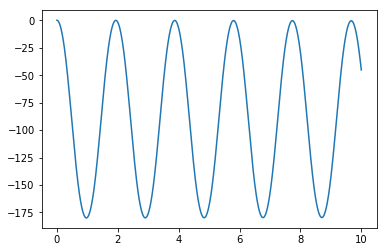

In [4]:
plt.plot(y.t,y.y[2]*180/pi)

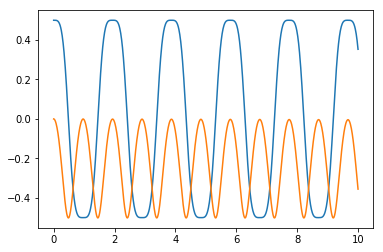

In [5]:
plt.plot(y.t,y.y[0])
plt.plot(y.t,y.y[1])